In [1]:
import os
os.chdir('..')

# Download Data

In [ ]:
%pip install gdown

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1mSOLE6la14zhGFVchLeWlhGGnJ40K-kP'
output = 'data.zip'
gdown.download(url, output)

# OR manually download from here:
# https://drive.google.com/file/d/1mSOLE6la14zhGFVchLeWlhGGnJ40K-kP/view?usp=sharing

In [3]:
import zipfile

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('')

# Store Init Models

In [ ]:
from fair_graphs.models.graph_models import SSF, Encoder

## German

In [ ]:
from fair_graphs.datasets.graph_datasets import GermanData

data = GermanData(sensitive_attribute = 'Gender',
                  target_attribute = 'GoodCustomer',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)
data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
                'out_channels': data.samples.shape[1],
                'base_model': 'gcn'}

fixed_params = {'num_hidden': data.samples.shape[1],
                    'num_projection_hidden': data.samples.shape[1],
                    'num_class': 1} 

enc = Encoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init', name_extension='init_german', device=None)

## Bail

In [ ]:
from fair_graphs.datasets.graph_datasets import BailData

data = BailData(sensitive_attribute = 'WHITE',
                target_attribute = 'RECID',
                include_sensitive = True,
                num_samples = 0,
                pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
                'out_channels': data.samples.shape[1],
                'base_model': 'gcn'}

fixed_params = {'num_hidden': data.samples.shape[1],
                    'num_projection_hidden': data.samples.shape[1],
                    'num_class': 1} 


enc = Encoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init', name_extension='init_bail', device=None)

## Credit

In [ ]:
from fair_graphs.datasets.graph_datasets import CreditData

data = CreditData(sensitive_attribute = 'Age',
                  target_attribute = 'NoDefaultNextMonth',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
                'out_channels': data.samples.shape[1],
                'base_model': 'gcn'}

fixed_params = {'num_hidden': data.samples.shape[1],
                    'num_projection_hidden': data.samples.shape[1],
                    'num_class': 1} 


enc = Encoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init', name_extension='init_credit', device=None)

## Pokec

### region z

In [ ]:
from fair_graphs.datasets.graph_datasets import PokecData

data = PokecData(sensitive_attribute = "region", # "region", "gender"
                  target_attribute = 'marital_status_indicator',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False,
                  region_suffix = 'z')

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
                'out_channels': data.samples.shape[1],
                'base_model': 'gcn'}

fixed_params = {'num_hidden': data.samples.shape[1],
                    'num_projection_hidden': data.samples.shape[1],
                    'num_class': 1} 


enc = Encoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init', name_extension='init_pokec_z', device=None)

### region n

In [ ]:
from fair_graphs.datasets.graph_datasets import PokecData

data = PokecData(sensitive_attribute = "region", # "region", "gender"
                  target_attribute = 'marital_status_indicator',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False,
                  region_suffix = 'n')

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

In [ ]:
enc_params = {'in_channels': data.samples.shape[1],
                'out_channels': data.samples.shape[1],
                'base_model': 'gcn'}

fixed_params = {'num_hidden': data.samples.shape[1],
                    'num_projection_hidden': data.samples.shape[1],
                    'num_class': 1} 


enc = Encoder(**enc_params)
net = SSF(enc, **fixed_params)
net.save_state_dict(save_path='data/model_init', name_extension='init_pokec_n', device=None)

# Cross Validation

### train

In [3]:
from sklearn.metrics import accuracy_score, roc_auc_score
from fair_graphs.cross_validation.method import cross_validation
from fair_graphs.metrics.simple_scorers import SubgroupsMetricScorer, DDPMetricScorer, CounterfactualScorer

In [4]:
from fair_graphs.datasets.graph_datasets import GermanData

data = GermanData(sensitive_attribute = 'Gender',
                  target_attribute = 'GoodCustomer',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)
data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

(torch.Size([1000, 27]), torch.Size([1000]), torch.Size([1000]), (1000, 1000))

In [5]:
eval_scorers = {
    # utility scorers
    'roc': SubgroupsMetricScorer(roc_auc_score),
    "rocSens0": SubgroupsMetricScorer(roc_auc_score, sensitive_group=0),
    "rocSens1": SubgroupsMetricScorer(roc_auc_score, sensitive_group=1),
    "accuracy": SubgroupsMetricScorer(accuracy_score, need_class_predictions=True),
    "accuracySens0": SubgroupsMetricScorer(accuracy_score, sensitive_group=0, need_class_predictions=True),
    "accuracySens1": SubgroupsMetricScorer(accuracy_score, sensitive_group=1, need_class_predictions=True),
    "accuracyPos": SubgroupsMetricScorer(accuracy_score, evaluation_class=1, need_class_predictions=True),
    "accuracyNeg": SubgroupsMetricScorer(accuracy_score, evaluation_class=0, need_class_predictions=True),

    # fairness scorers
    'demographicParity': DDPMetricScorer(),
    'demographicParityPreds': DDPMetricScorer(need_class_predictions=True),
    'equalOpportunityPos': DDPMetricScorer(evaluation_class=1),
    'equalOpportunityPosPreds': DDPMetricScorer(evaluation_class=1, need_class_predictions=True),
    'equalOpportunityNeg': DDPMetricScorer(evaluation_class=0),
    'equalOpportunityNegPreds': DDPMetricScorer(evaluation_class=0, need_class_predictions=True),
    "demographicParityRoc": DDPMetricScorer(roc_auc_score),
    "demographicParityAccuracy": DDPMetricScorer(accuracy_score, need_class_predictions=True),
    "equalOpportunityPosAccuracy": DDPMetricScorer(accuracy_score, evaluation_class=1, need_class_predictions=True),
    "equalOpportunityNegAccuracy": DDPMetricScorer(accuracy_score, evaluation_class=0, need_class_predictions=True),
    "counterfactual": CounterfactualScorer(),
    "counterfactualPreds": CounterfactualScorer(need_class_predictions=True),
    "counterfactualPos": CounterfactualScorer(evaluation_class=1),
    "counterfactualPosPreds": CounterfactualScorer(evaluation_class=1, need_class_predictions=True),
    "counterfactualNeg": CounterfactualScorer(evaluation_class=0),
    "counterfactualNegPreds": CounterfactualScorer(evaluation_class=0, need_class_predictions=True),
}

In [ ]:
cross_validation(data, 30, eval_scorers,
                 scenario = 'inductive',
                 activate_fae=True, f_lmbd='1')

### evaluate

#### results file processing

In [2]:
import os
import pandas as pd

scenario = 'transductive' # inductive, transductive, one_node_out

In [4]:
from fair_graphs.cross_validation.results_handler import build_multiindex

build_multiindex('german', path=f"results/{scenario}/fd/")
df = build_multiindex('german', path=f"results/{scenario}/fd_fae/")
build_multiindex('bail', path=f"results/{scenario}/fd/")
build_multiindex('bail', path=f"results/{scenario}/fd_fae/")
build_multiindex('credit', path=f"results/{scenario}/fd/")
build_multiindex('credit', path=f"results/{scenario}/fd_fae/")
build_multiindex('pokec_z', path=f"results/{scenario}/fd/")
build_multiindex('pokec_z', path=f"results/{scenario}/fd_fae/")
df

params                                                         \
    highest_homo_perc drop_criteria edge_drop_rate feat_drop_rate sim_lambda   
0                -1.0                          0.2            0.2        0.2   
1                -1.0                          0.2            0.2        0.5   
2                -1.0                          0.2            0.2        0.8   
3                -1.0                          0.2            0.5        0.2   
4                -1.0                          0.2            0.5        0.5   
..                ...           ...            ...            ...        ...   
319               0.8           1.0            0.8            0.5        0.5   
320               0.8           1.0            0.8            0.5        0.8   
321               0.8           1.0            0.8            0.8        0.2   
322               0.8           1.0            0.8            0.8        0.5   
323               0.8           1.0            0.8            0.8        0.8   

    mean_train_roc std_train_roc mean_validation_roc std_validation_roc  \
                                                                          
0         0.544133      0.022609            0.512967           0.039365   
1         0.513933      0.016209            0.485067           0.040508   
2         0.468700      0.013257            0.447700           0.041161   
3         0.500233      0.019404            0.477700           0.038321   
4         0.485300      0.021281            0.460400           0.038236   
..             ...           ...                 ...                ...   
319       0.678933      0.012409            0.659267           0.043492   
320       0.656067      0.012946            0.640167           0.045584   
321       0.678100      0.011842            0.656900           0.043580   
322       0.674933      0.014812            0.657767           0.043884   
323       0.655633      0.012763            0.640100           0.046558   

    mean_test_roc  ... mean_validation_counterfactualNeg  \
                   ...                                     
0        0.511167  ...                         -0.037933   
1        0.492933  ...                         -0.053000   
2        0.453733  ...                         -0.061500   
3        0.482200  ...                         -0.025400   
4        0.466967  ...                         -0.032500   
..            ...  ...                               ...   
319      0.679000  ...                         -0.038533   
320      0.660767  ...                         -0.042033   
321      0.677567  ...                         -0.042733   
322      0.673833  ...                         -0.043667   
323      0.661833  ...                         -0.040133   

    std_validation_counterfactualNeg mean_test_counterfactualNeg  \
                                                                   
0                           0.012307                   -0.039067   
1                           0.007789                   -0.052200   
2                           0.007566                   -0.062433   
3                           0.009193                   -0.023567   
4                           0.010082                   -0.031667   
..                               ...                         ...   
319                         0.006526                   -0.040933   
320                         0.007002                   -0.042567   
321                         0.006952                   -0.045500   
322                         0.008146                   -0.042567   
323                         0.004287                   -0.042167   

    std_test_counterfactualNeg mean_train_counterfactualNegPreds  \
                                                                   
0                     0.011337                          0.000000   
1                     0.011791                          0.000000   
2                     0.008437                          0.00

In [6]:
from fair_graphs.cross_validation.results_handler import split_nifty_from_ours

split_nifty_from_ours('german', path=f"results/{scenario}/fd/")
split_nifty_from_ours('german', path=f"results/{scenario}/fd_fae/")
split_nifty_from_ours('bail', path=f"results/{scenario}/fd/")
split_nifty_from_ours('bail', path=f"results/{scenario}/fd_fae/")
split_nifty_from_ours('credit', path=f"results/{scenario}/fd/")
split_nifty_from_ours('credit', path=f"results/{scenario}/fd_fae/")
split_nifty_from_ours('pokec_z', path=f"results/{scenario}/fd/")
split_nifty_from_ours('pokec_z', path=f"results/{scenario}/fd_fae/")

In [7]:
select_strats = [
    # standard best metric
    "roc", 'accuracy',
    'demographicParity', 'equalOpportunityNeg', 'equalOpportunityPos',
    'demographicParityPreds', 'equalOpportunityNegPreds', 'equalOpportunityPosPreds',
    'counterfactual', 'counterfactualPos', 'counterfactualNeg',
    'counterfactualPreds', 'counterfactualPosPreds', 'counterfactualNegPreds',
    
    "demographicParityRoc", 'demographicParityAccuracy',
    "equalOpportunityNegAccuracy", "equalOpportunityPosAccuracy",
    
    # best metric within utility percentile
    "90_roc_min_demographicParity", "90_accuracy_min_demographicParity",
    "90_roc_min_equalOpportunityNeg", "90_roc_min_equalOpportunityPos",
    "90_accuracy_min_equalOpportunityNeg", "90_accuracy_min_equalOpportunityPos",
    "90_roc_min_counterfactual", "90_accuracy_min_counterfactual",
    "90_accuracy_min_counterfactualPos", "90_accuracy_min_counterfactualNeg",

    "90_roc_min_demographicParityPreds", "90_accuracy_min_demographicParityPreds",
    "90_roc_min_equalOpportunityNegPreds", "90_roc_min_equalOpportunityPosPreds",
    "90_accuracy_min_equalOpportunityNegPreds", "90_accuracy_min_equalOpportunityPosPreds",
    "90_roc_min_counterfactualPreds", "90_accuracy_min_counterfactualPreds",
    "90_accuracy_min_counterfactualPosPreds", "90_accuracy_min_counterfactualNegPreds",

    "90_roc_min_demographicParityRoc", "90_accuracy_min_demographicParityAccuracy",
    "90_accuracy_min_equalOpportunityNegAccuracy", "90_accuracy_min_equalOpportunityPosAccuracy",

    "95_roc_min_demographicParity", "95_accuracy_min_demographicParity",
    "95_roc_min_equalOpportunityNeg", "95_roc_min_equalOpportunityPos",
    "95_accuracy_min_equalOpportunityNeg", "95_accuracy_min_equalOpportunityPos",
    "95_roc_min_counterfactual", "95_accuracy_min_counterfactual",
    "95_accuracy_min_counterfactualPos", "95_accuracy_min_counterfactualNeg",

    "95_roc_min_demographicParityPreds", "95_accuracy_min_demographicParityPreds",
    "95_roc_min_equalOpportunityNegPreds", "95_roc_min_equalOpportunityPosPreds",
    "95_accuracy_min_equalOpportunityNegPreds", "95_accuracy_min_equalOpportunityPosPreds",
    "95_roc_min_counterfactualPreds", "95_accuracy_min_counterfactualPreds",
    "95_accuracy_min_counterfactualPosPreds", "95_accuracy_min_counterfactualNegPreds",

    "95_roc_min_demographicParityRoc", "95_accuracy_min_demographicParityAccuracy",
    "95_accuracy_min_equalOpportunityNegAccuracy", "95_accuracy_min_equalOpportunityPosAccuracy",
]

eval_scorers = [
    # utility scorers
    'roc', "accuracy", "accuracySens0", "accuracySens1", "accuracyPos", "accuracyNeg",
    # fairness scorers
    'demographicParity', 'equalOpportunityPos', 'equalOpportunityNeg',
    'demographicParityPreds', 'equalOpportunityPosPreds', 'equalOpportunityNegPreds',
    "demographicParityRoc", "demographicParityAccuracy", "equalOpportunityPosAccuracy", "equalOpportunityNegAccuracy",
    "counterfactual", "counterfactualPos", "counterfactualNeg",
    "counterfactualPreds", "counterfactualPosPreds", "counterfactualNegPreds",
]

In [8]:
from fair_graphs.cross_validation.results_handler import retrieve_best_res_from_hyperparams_df

In [ ]:
for d in ['german','bail','credit','pokec_z']:
    for meth in ['ours','nifty']:
        for p in [f'{scenario}/fd',f'{scenario}/fd_fae',]:
            print(d,meth,p)
            retrieve_best_res_from_hyperparams_df(
                selection_strats = select_strats,
                evaluation_scorers = eval_scorers,
                file_name = f'{d}_simple_multi_{meth}.pickle',
                selection_phase = 'validation',
                file_path = f"results/{p}",
                verbose_selection = False)


#### Print Tables

In [ ]:
%pip install gdown

In [ ]:
# Optionally download paper results preprocessed file

import gdown

url = 'https://drive.google.com/uc?id=12IoVGAcI7dyfqMVPfXwYwwWl6jYc-UiT'
output = 'results.zip'
gdown.download(url, output)

# OR manually download from here:
# https://drive.google.com/file/d/12IoVGAcI7dyfqMVPfXwYwwWl6jYc-UiT/view?usp=sharing

In [ ]:
import zipfile

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('')

In [4]:
from fair_graphs.cross_validation.results_handler import print_selection_table

In [115]:
sel_strat = ["roc", 'accuracy','demographicParity', "90_roc_min_demographicParity", "95_roc_min_demographicParity", "90_accuracy_min_demographicParity", "95_accuracy_min_demographicParity",
             #"roc", 'accuracy','equalOpportunityPos', "90_roc_min_equalOpportunityPos", "95_roc_min_equalOpportunityPos", "90_accuracy_min_equalOpportunityPos", "95_accuracy_min_equalOpportunityPos",
             #"roc", 'accuracy','equalOpportunityNeg', "90_roc_min_equalOpportunityNeg", "95_roc_min_equalOpportunityNeg", "90_accuracy_min_equalOpportunityNeg", "95_accuracy_min_equalOpportunityNeg",
             #"roc", 'accuracy','counterfactual', "90_roc_min_counterfactual", "95_roc_min_counterfactual", "90_accuracy_min_counterfactual", "95_accuracy_min_counterfactual",
             #"roc", 'accuracy','demographicParityPreds', "90_roc_min_demographicParityPreds", "95_roc_min_demographicParityPreds", "90_accuracy_min_demographicParityPreds", "95_accuracy_min_demographicParityPreds",
             #"roc", 'accuracy','equalOpportunityPosPreds', "90_roc_min_equalOpportunityPosPreds", "95_roc_min_equalOpportunityPosPreds", "90_accuracy_min_equalOpportunityPosPreds", "95_accuracy_min_equalOpportunityPosPreds",
             #"roc", 'accuracy','equalOpportunityNegPreds', "90_roc_min_equalOpportunityNegPreds", "95_roc_min_equalOpportunityNegPreds", "90_accuracy_min_equalOpportunityNegPreds", "95_accuracy_min_equalOpportunityNegPreds",
             #"roc", 'accuracy','counterfactualPreds', "90_roc_min_counterfactualPreds", "95_roc_min_counterfactualPreds", "90_accuracy_min_counterfactualPreds", "95_accuracy_min_counterfactualPreds",
             #'accuracy', 'demographicParityAccuracy', "90_accuracy_min_demographicParityAccuracy", "95_accuracy_min_demographicParityAccuracy",
             #'accuracy', 'equalOpportunityPosAccuracy', "90_accuracy_min_equalOpportunityPosAccuracy", "95_accuracy_min_equalOpportunityPosAccuracy",
             #'accuracy', 'equalOpportunityNegAccuracy', "90_accuracy_min_equalOpportunityNegAccuracy", "95_accuracy_min_equalOpportunityNegAccuracy",
             #"roc", 'demographicParityRoc', "90_roc_min_demographicParityRoc", "95_roc_min_demographicParityRoc",
            ]

eval_metr = ['roc', "accuracy", 'demographicParity',
             #'roc', "accuracy", 'equalOpportunityPos',
             #'roc', "accuracy", 'equalOpportunityNeg',
             #'roc', "accuracy", 'counterfactual',
             #'roc', "accuracy", 'demographicParityPreds',
             #'roc', "accuracy", 'equalOpportunityPosPreds',
             #'roc', "accuracy", 'equalOpportunityNegPreds',
             #'roc', "accuracy", 'counterfactualPreds',
             #"accuracy", 'demographicParityAccuracy',
             #"accuracy", 'equalOpportunityPosAccuracy',
             #"accuracy", 'equalOpportunityNegAccuracy',
             #'roc', 'demographicParityRoc',
            ]

##### German - inductive

In [116]:
data = 'german'
s = 'inductive'

##### German - transductive

In [120]:
data = 'german'
s = 'transductive'

##### Bail - inductive

In [124]:
data = 'bail'
s = 'inductive'

##### Bail - transductive

In [128]:
data = 'bail'
s = 'transductive'

##### Credit - inductive

In [132]:
data = 'credit'
s = 'inductive'

##### Credit - transductive

In [136]:
data = 'credit'
s = 'transductive'

##### Pokec - inductive

In [140]:
data = 'pokec_z'
s = 'inductive'

##### Pokec - transductive

In [144]:
data = 'pokec_z'
s = 'transductive'

##### plot

In [145]:
# our - with generic fair attribute
fn = os.path.join('results',s,"fd_fae",'selection_strategy_results',
                  f'{data}_simple_multi_ours.pickle')

print_selection_table(full_fn = fn,
                      phase = 'test',
                      selection_strategies = sel_strat,
                      eval_metrics = eval_metr)

,roc,accuracy,counterfactual,params
roc,0.934 ± 0.021,0.845 ± 0.036,-0.343 ± 0.057,"{'highest_homo_perc': 0.2, 'drop_criteria': 1.0, 'edge_drop_rate': 0.8, 'feat_drop_rate': 0.2, 'sim_lambda': 0.5}"
accuracy,0.930 ± 0.018,0.832 ± 0.026,-0.242 ± 0.046,"{'highest_homo_perc': 0.2, 'drop_criteria': '', 'edge_drop_rate': 0.8, 'feat_drop_rate': 0.2, 'sim_lambda': 0.5}"
counterfactual,0.888 ± 0.026,0.781 ± 0.042,-0.062 ± 0.022,"{'highest_homo_perc': 0.5, 'drop_criteria': 0.0, 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.8}"
90_roc_min_counterfactual,0.888 ± 0.026,0.781 ± 0.042,-0.062 ± 0.022,"{'highest_homo_perc': 0.5, 'drop_criteria': 0.0, 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.8}"
95_roc_min_counterfactual,0.888 ± 0.026,0.781 ± 0.042,-0.062 ± 0.022,"{'highest_homo_perc': 0.5, 'drop_criteria': 0.0, 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.8}"
90_accuracy_min_counterfactual,0.888 ± 0.026,0.781 ± 0.042,-0.062 ± 0.022,"{'highest_homo_perc': 0.5, 'drop_criteria': 0.0, 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.8}"
95_accuracy_min_counterfactual,0.904 ± 0.023,0.812 ± 0.027,-0.064 ± 0.024,"{'highest_homo_perc': 0.2, 'drop_criteria': 0.0, 'edge_drop_rate': 0.8, 'feat_drop_rate': 0.8, 'sim_lambda': 0.2}"


In [146]:
# nifty
fn = os.path.join('results',s,"fd",'selection_strategy_results',
                  f'{data}_simple_multi_nifty.pickle')

print_selection_table(full_fn = fn,
                      phase = 'test',
                      selection_strategies = sel_strat,
                      eval_metrics = eval_metr)

,roc,accuracy,counterfactual,params
roc,0.920 ± 0.024,0.831 ± 0.041,-0.643 ± 0.056,"{'highest_homo_perc': -1.0, 'drop_criteria': '', 'edge_drop_rate': 0.8, 'feat_drop_rate': 0.2, 'sim_lambda': 0.5}"
accuracy,0.922 ± 0.019,0.841 ± 0.029,-0.631 ± 0.028,"{'highest_homo_perc': -1.0, 'drop_criteria': '', 'edge_drop_rate': 0.8, 'feat_drop_rate': 0.2, 'sim_lambda': 0.8}"
counterfactual,0.891 ± 0.024,0.797 ± 0.044,-0.583 ± 0.063,"{'highest_homo_perc': -1.0, 'drop_criteria': '', 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.5}"
90_roc_min_counterfactual,0.891 ± 0.024,0.797 ± 0.044,-0.583 ± 0.063,"{'highest_homo_perc': -1.0, 'drop_criteria': '', 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.5}"
95_roc_min_counterfactual,0.891 ± 0.024,0.797 ± 0.044,-0.583 ± 0.063,"{'highest_homo_perc': -1.0, 'drop_criteria': '', 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.5}"
90_accuracy_min_counterfactual,0.891 ± 0.024,0.797 ± 0.044,-0.583 ± 0.063,"{'highest_homo_perc': -1.0, 'drop_criteria': '', 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.5}"
95_accuracy_min_counterfactual,0.895 ± 0.021,0.805 ± 0.027,-0.589 ± 0.057,"{'highest_homo_perc': -1.0, 'drop_criteria': '', 'edge_drop_rate': 0.2, 'feat_drop_rate': 0.8, 'sim_lambda': 0.8}"


# Standard training

## Initialization

In [2]:
# ----- Standard Imports
import matplotlib.pyplot as plt
from collections import defaultdict

# ----- Third Party Imports
from torchmetrics.functional.classification import binary_auroc, binary_accuracy

# ----- Library Imports
from fair_graphs.models.graph_models import SSF, Encoder
from fair_graphs.training.standard_training import optimize_gnn
from fair_graphs.metrics.scorers import SubgroupsMetricScorer, DDPMetricScorer, CounterfactualScorer

In [3]:
def plot_results(results_dict,
                 phases=['train', 'test'],
                 metrics = ['roc','accuracy','demographicParity'],
                ):
    flatten_res = defaultdict(list)
    perc_list = []
    for perc, scores in results_dict.items():
        perc_list.append(perc)
        for metr, val in scores.items():
            flatten_res[metr].append(val)
        
    fig, axs = plt.subplots(len(phases), len(metrics), figsize=(10,3), squeeze=False)
    for ph_idx, phase in enumerate(phases):
        for metr_idx, metric in enumerate(metrics):
            title = f'{phase}_{metric}'
            if title in flatten_res.keys():
                axs[ph_idx, metr_idx].set_title(title)
                axs[ph_idx, metr_idx].plot(flatten_res[title])
                axs[ph_idx, metr_idx].grid()
                axs[ph_idx, metr_idx].set_xticks(ticks=range(len(perc_list)),labels=perc_list)
    fig.tight_layout()

In [4]:
enc_params = {'out_channels': 16,
              'base_model': 'gcn'}
fixed_params = {'num_hidden': 16,
                'num_projection_hidden': 16,
                'num_class': 1,
                'edge_drop_rate': .8,
                'feat_drop_rate': .3,
                'sim_lambda': .5,
                'highest_homo_perc': .3,
                'correlation_threshold': -1}
fit_params = {'test_size': .25,
              'rnd_seed': 42,
              'training_epochs': 500,
              'device_idx': 1,
              'learning_rate': 1e-3,
              'weight_decay': 1e-5,
              'store_model': True}

n_augm = 30

eval_scorers = {
    # utility scorers
    'roc': SubgroupsMetricScorer(binary_auroc, num_augmented=n_augm),
    "rocSens0": SubgroupsMetricScorer(binary_auroc, sensitive_group=0, num_augmented=n_augm),
    "rocSens1": SubgroupsMetricScorer(binary_auroc, sensitive_group=1, num_augmented=n_augm),
    "accuracy": SubgroupsMetricScorer(binary_accuracy, need_class_predictions=True, num_augmented=n_augm),
    "accuracySens0": SubgroupsMetricScorer(binary_accuracy, sensitive_group=0, need_class_predictions=True, num_augmented=n_augm),
    "accuracySens1": SubgroupsMetricScorer(binary_accuracy, sensitive_group=1, need_class_predictions=True, num_augmented=n_augm),
    "accuracyPos": SubgroupsMetricScorer(binary_accuracy, evaluation_class=1, need_class_predictions=True, num_augmented=n_augm),
    "accuracyNeg": SubgroupsMetricScorer(binary_accuracy, evaluation_class=0, need_class_predictions=True, num_augmented=n_augm),

    # fairness scorers
    'demographicParity': DDPMetricScorer(num_augmented=n_augm),
    'demographicParityPreds': DDPMetricScorer(need_class_predictions=True, num_augmented=n_augm),
    'equalOpportunityPos': DDPMetricScorer(evaluation_class=1, num_augmented=n_augm),
    'equalOpportunityPosPreds': DDPMetricScorer(need_class_predictions=True, evaluation_class=1, num_augmented=n_augm),
    'equalOpportunityNeg': DDPMetricScorer(evaluation_class=0, num_augmented=n_augm),
    'equalOpportunityNegPreds': DDPMetricScorer(need_class_predictions=True, evaluation_class=0, num_augmented=n_augm),
    "demographicParityRoc": DDPMetricScorer(binary_auroc, num_augmented=n_augm),
    "demographicParityAccuracy": DDPMetricScorer(binary_accuracy, need_class_predictions=True, num_augmented=n_augm),
    "equalOpportunityPosAccuracy": DDPMetricScorer(binary_accuracy, evaluation_class=1, need_class_predictions=True, num_augmented=n_augm),
    "equalOpportunityNegAccuracy": DDPMetricScorer(binary_accuracy, evaluation_class=0, need_class_predictions=True, num_augmented=n_augm),
    "counterfactual": CounterfactualScorer(num_augmented=n_augm),
    "counterfactualPreds": CounterfactualScorer(need_class_predictions=True, num_augmented=n_augm),
    "counterfactualPos": CounterfactualScorer(evaluation_class=1, num_augmented=n_augm),
    "counterfactualPosPreds": CounterfactualScorer(need_class_predictions=True,  evaluation_class=1, num_augmented=n_augm),
    "counterfactualNeg": CounterfactualScorer(evaluation_class=0, num_augmented=n_augm),
    "counterfactualNegPreds": CounterfactualScorer(need_class_predictions=True,  evaluation_class=0, num_augmented=n_augm),
}

## German data

In [ ]:
from fair_graphs.datasets.graph_datasets import GermanData

data = GermanData(sensitive_attribute = 'Gender',
                  target_attribute = 'GoodCustomer',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)
data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

(torch.Size([1000, 27]), torch.Size([1000]), torch.Size([1000]), (1000, 1000))

In [ ]:
enc_params['in_channels'] = data.samples.shape[1]
fixed_params['load_dict'] = {'save_path':'data/model_init', 'name_extension':'init_german'}

In [ ]:
from fair_graphs.datasets.datasets_utils import edges_coo_from_adj_matrix
edg = edges_coo_from_adj_matrix(data.adj_mtx)

enc = Encoder(**enc_params)
net = SSF(enc, **fixed_params)

net(data.samples, edg).shape

torch.Size([1000, 1])

In [ ]:
homo_perc_dict = {}
for homo_perc in [-1, .2, .5, .8, 1.]:
    print()
    fixed_params['highest_homo_perc'] = homo_perc
    enc = Encoder(**enc_params)
    net = SSF(enc, **fixed_params)

    results = optimize_gnn(graph_dataset = data,
                           graph_net = net,
                           evaluation_metrics = eval_scorers,
                           **fit_params)
    
    homo_perc_dict[homo_perc] = results

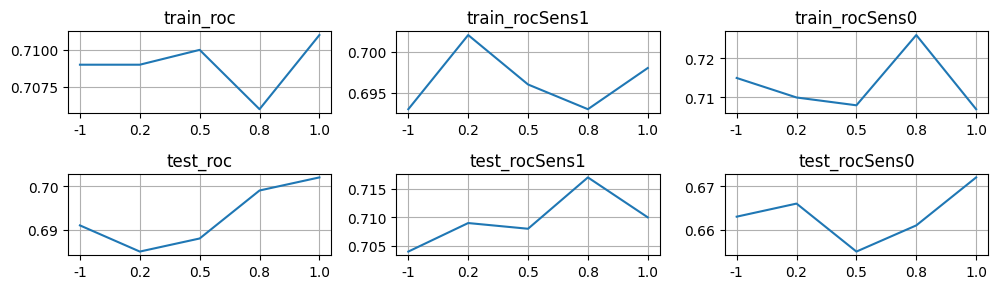

In [ ]:
plot_results(homo_perc_dict, metrics=['roc','rocSens1','rocSens0'])

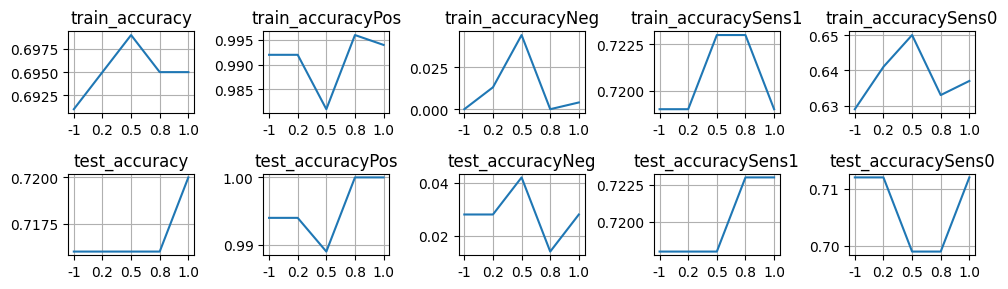

In [ ]:
plot_results(homo_perc_dict, metrics=['accuracy','accuracyPos','accuracyNeg','accuracySens1','accuracySens0'])

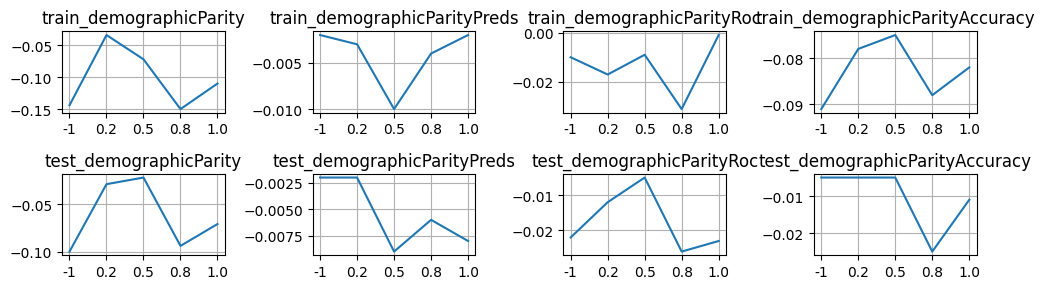

In [ ]:
plot_results(homo_perc_dict, metrics=['demographicParity','demographicParityPreds','demographicParityRoc','demographicParityAccuracy'])

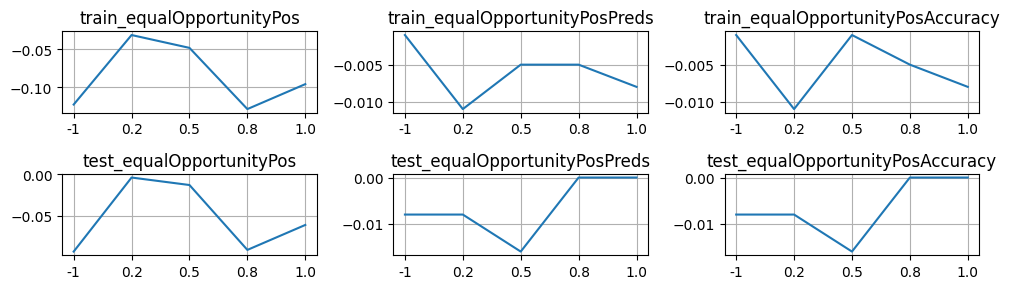

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityPos','equalOpportunityPosPreds','equalOpportunityPosAccuracy'])

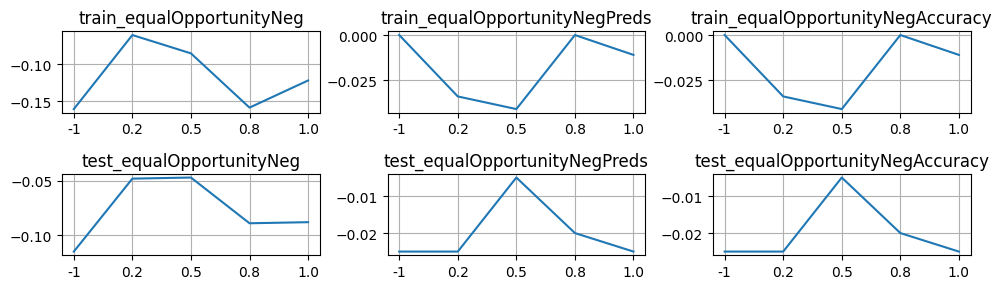

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityNeg','equalOpportunityNegPreds','equalOpportunityNegAccuracy'])

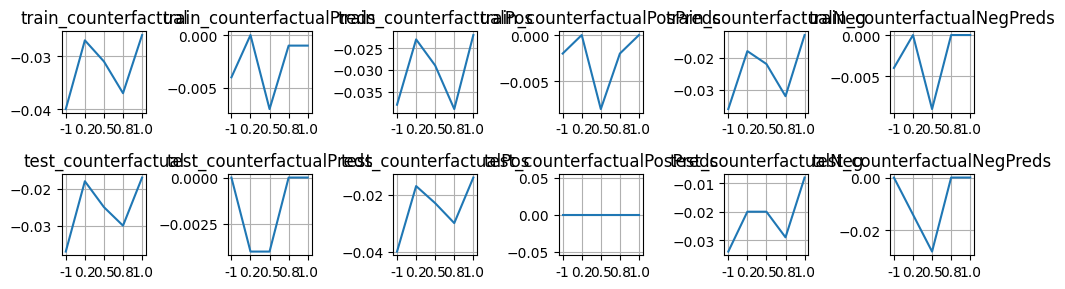

In [ ]:
plot_results(homo_perc_dict, metrics=['counterfactual','counterfactualPreds','counterfactualPos','counterfactualPosPreds','counterfactualNeg','counterfactualNegPreds'])

## Bail data

In [ ]:
from fair_graphs.datasets.graph_datasets import BailData

data = BailData(sensitive_attribute = 'WHITE',
                target_attribute = 'RECID',
                include_sensitive = True,
                num_samples = 0,
                pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

(torch.Size([18876, 18]),
 torch.Size([18876]),
 torch.Size([18876]),
 (18876, 18876))

In [ ]:
enc_params['in_channels'] = data.samples.shape[1]
fixed_params['load_dict'] = {'save_path':'data/model_init', 'name_extension':'init_bail'}

In [ ]:
homo_perc_dict = {}
for homo_perc in [-1, .2, .5, .8, 1.]:
    print()
    fixed_params['highest_homo_perc'] = homo_perc
    enc = Encoder(**enc_params)
    net = SSF(enc, **fixed_params)

    results = optimize_gnn(graph_dataset = data,
                           graph_net = net,
                           evaluation_metrics = eval_scorers,
                           **fit_params)
    
    homo_perc_dict[homo_perc] = results

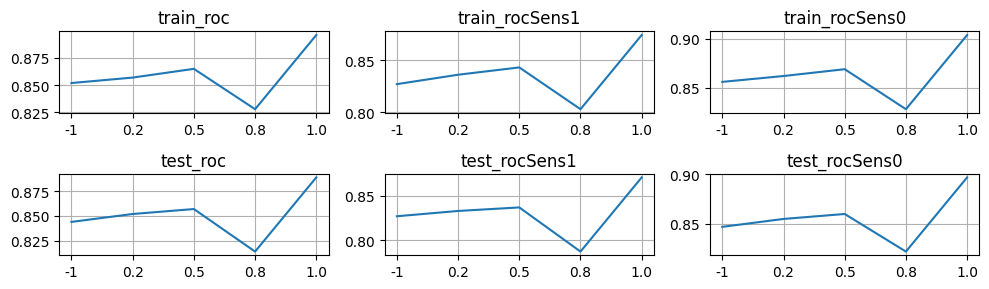

In [ ]:
plot_results(homo_perc_dict, metrics=['roc','rocSens1','rocSens0'])

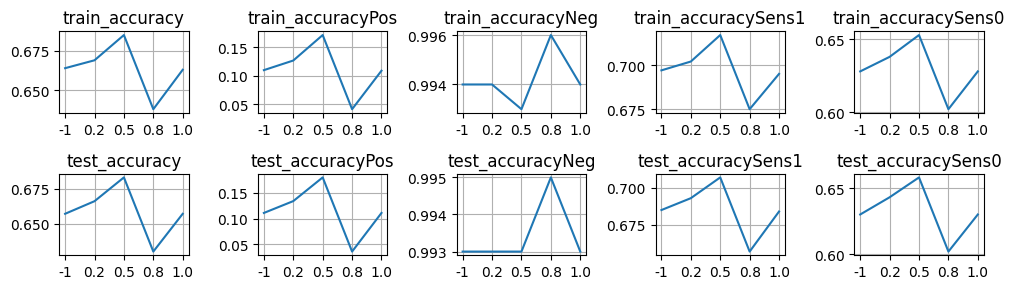

In [ ]:
plot_results(homo_perc_dict, metrics=['accuracy','accuracyPos','accuracyNeg','accuracySens1','accuracySens0'])

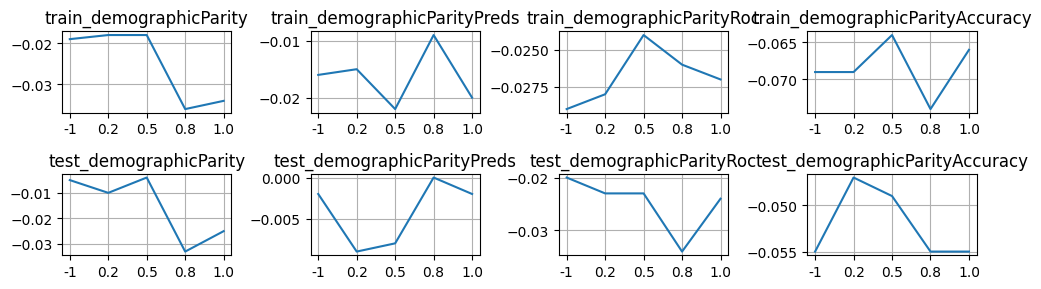

In [ ]:
plot_results(homo_perc_dict, metrics=['demographicParity','demographicParityPreds','demographicParityRoc','demographicParityAccuracy'])

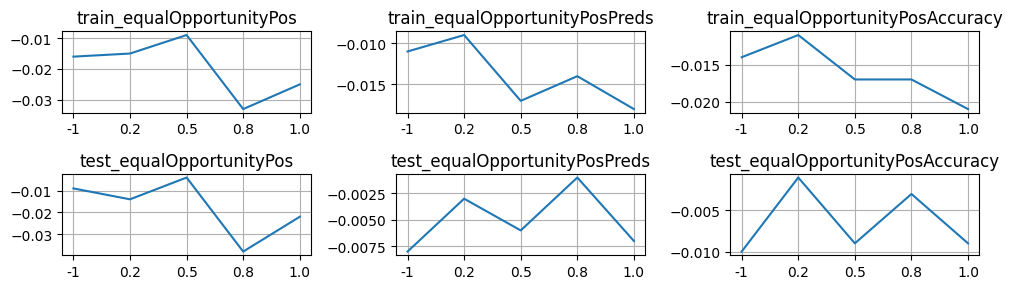

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityPos','equalOpportunityPosPreds','equalOpportunityPosAccuracy'])

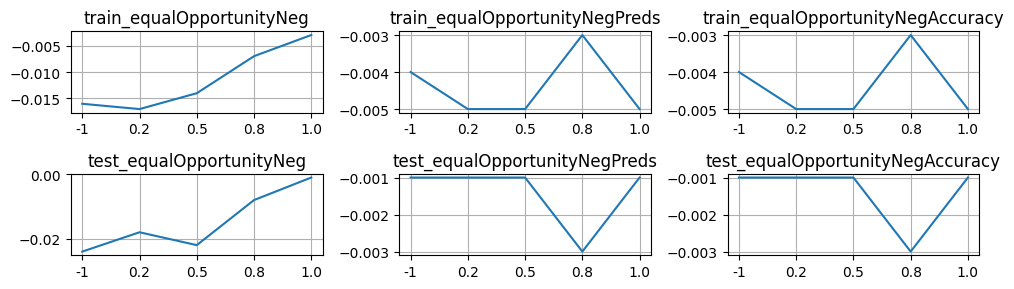

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityNeg','equalOpportunityNegPreds','equalOpportunityNegAccuracy'])

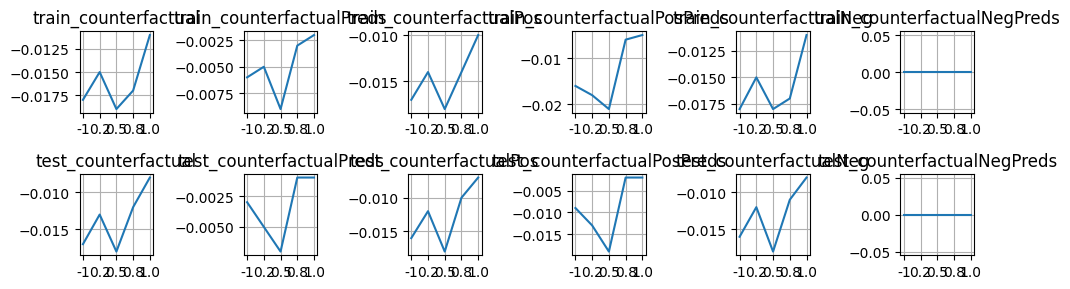

In [ ]:
plot_results(homo_perc_dict, metrics=['counterfactual','counterfactualPreds','counterfactualPos','counterfactualPosPreds','counterfactualNeg','counterfactualNegPreds'])

## Credit data

In [ ]:
from fair_graphs.datasets.graph_datasets import CreditData

data = CreditData(sensitive_attribute = 'Age',
                  target_attribute = 'NoDefaultNextMonth',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False)

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

(torch.Size([30000, 13]),
 torch.Size([30000]),
 torch.Size([30000]),
 (30000, 30000))

In [ ]:
enc_params['in_channels'] = data.samples.shape[1]
fixed_params['load_dict'] = {'save_path':'data/model_init', 'name_extension':'init_credit'}

In [ ]:
homo_perc_dict = {}
for homo_perc in [-1, .2, .5, .8, 1.]:
    print()
    fixed_params['highest_homo_perc'] = homo_perc
    enc = Encoder(**enc_params)
    net = SSF(enc, **fixed_params)

    results = optimize_gnn(graph_dataset = data,
                           graph_net = net,
                           evaluation_metrics = eval_scorers,
                           **fit_params)
    
    homo_perc_dict[homo_perc] = results

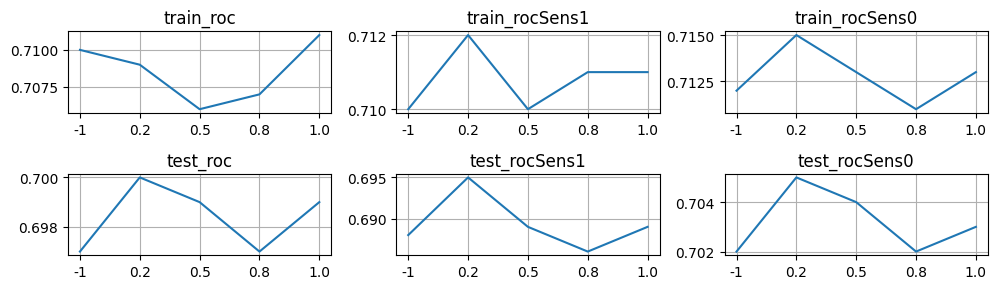

In [ ]:
plot_results(homo_perc_dict, metrics=['roc','rocSens1','rocSens0'])

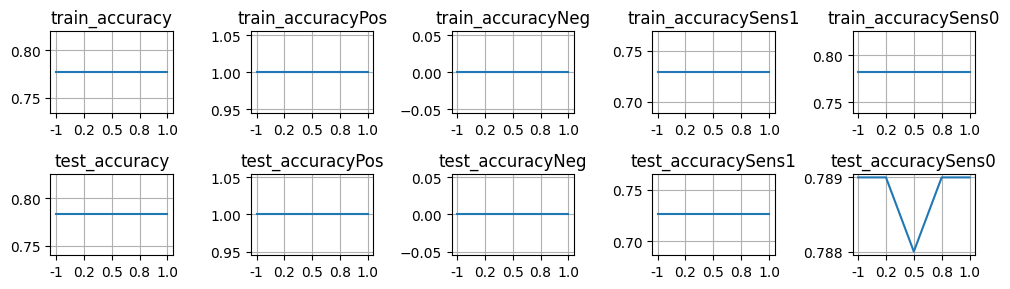

In [ ]:
plot_results(homo_perc_dict, metrics=['accuracy','accuracyPos','accuracyNeg','accuracySens1','accuracySens0'])

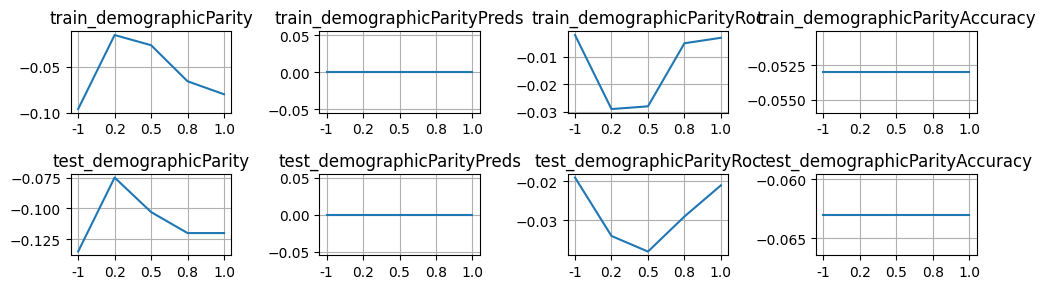

In [ ]:
plot_results(homo_perc_dict, metrics=['demographicParity','demographicParityPreds','demographicParityRoc','demographicParityAccuracy'])

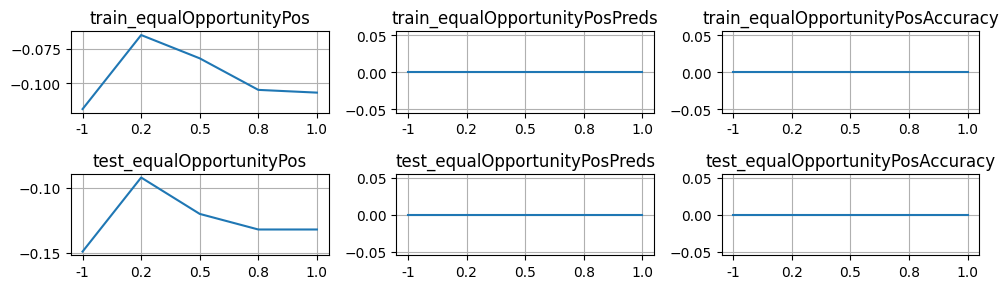

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityPos','equalOpportunityPosPreds','equalOpportunityPosAccuracy'])

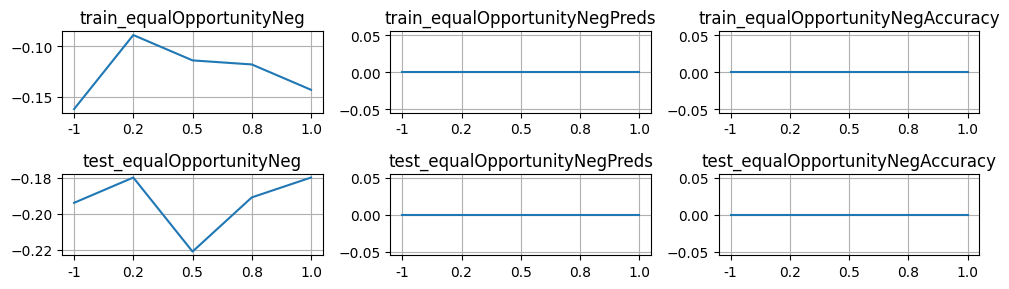

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityNeg','equalOpportunityNegPreds','equalOpportunityNegAccuracy'])

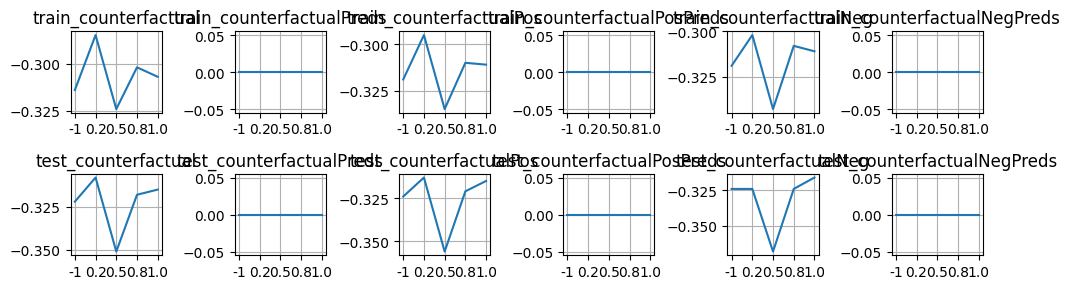

In [ ]:
plot_results(homo_perc_dict, metrics=['counterfactual','counterfactualPreds','counterfactualPos','counterfactualPosPreds','counterfactualNeg','counterfactualNegPreds'])

## Pokec data

### z region

In [5]:
from fair_graphs.datasets.graph_datasets import PokecData

data = PokecData(sensitive_attribute = "region", # "region", "gender"
                  target_attribute = 'marital_status_indicator',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False,
                  region_suffix = 'z')

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

(torch.Size([67796, 276]),
 torch.Size([67796]),
 torch.Size([67796]),
 (67796, 67796))

In [ ]:
enc_params['in_channels'] = data.samples.shape[1]
fixed_params['load_dict'] = {'save_path':'data/model_init', 'name_extension':'init_pokec_z'}

In [ ]:
homo_perc_dict = {}
for homo_perc in [-1, .2, .5, .8, 1.]:
    print()
    fixed_params['highest_homo_perc'] = homo_perc
    enc = Encoder(**enc_params)
    net = SSF(enc, **fixed_params)

    results = optimize_gnn(graph_dataset = data,
                           graph_net = net,
                           evaluation_metrics = eval_scorers,
                           **fit_params)
    
    homo_perc_dict[homo_perc] = results

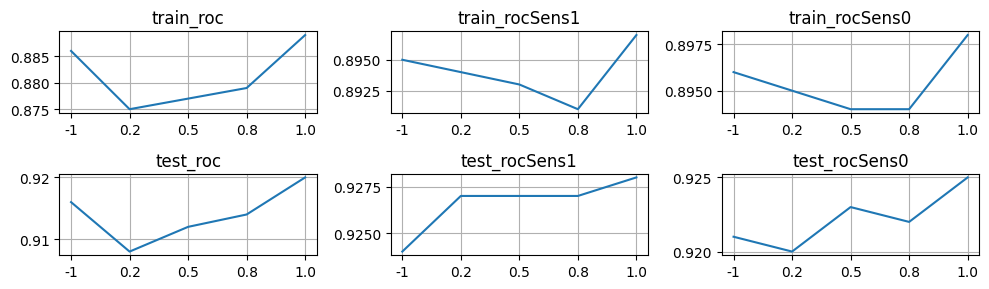

In [ ]:
plot_results(homo_perc_dict, metrics=['roc','rocSens1','rocSens0'])

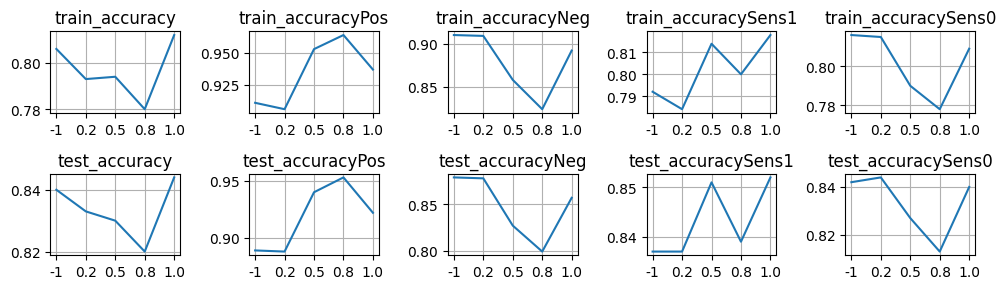

In [ ]:
plot_results(homo_perc_dict, metrics=['accuracy','accuracyPos','accuracyNeg','accuracySens1','accuracySens0'])

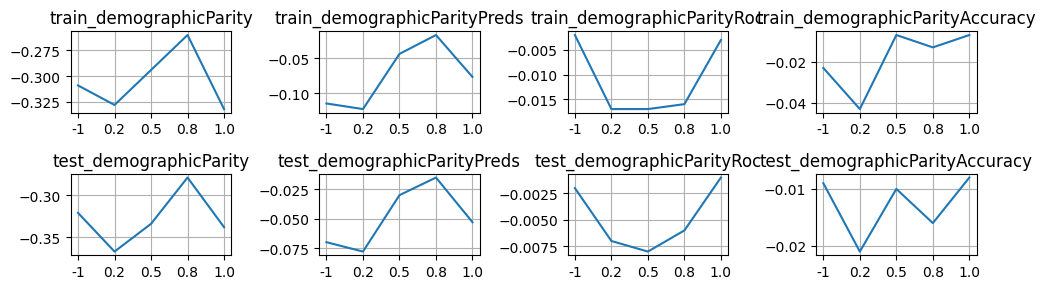

In [ ]:
plot_results(homo_perc_dict, metrics=['demographicParity','demographicParityPreds','demographicParityRoc','demographicParityAccuracy'])

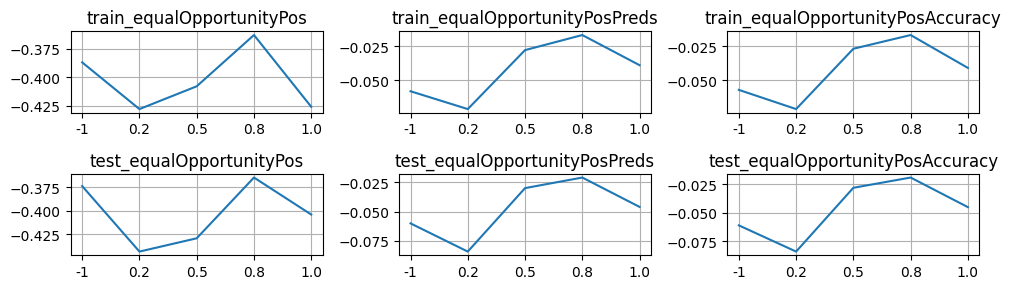

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityPos','equalOpportunityPosPreds','equalOpportunityPosAccuracy'])

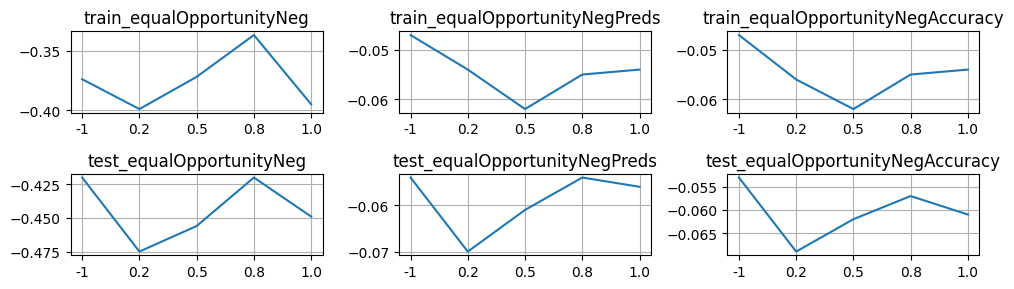

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityNeg','equalOpportunityNegPreds','equalOpportunityNegAccuracy'])

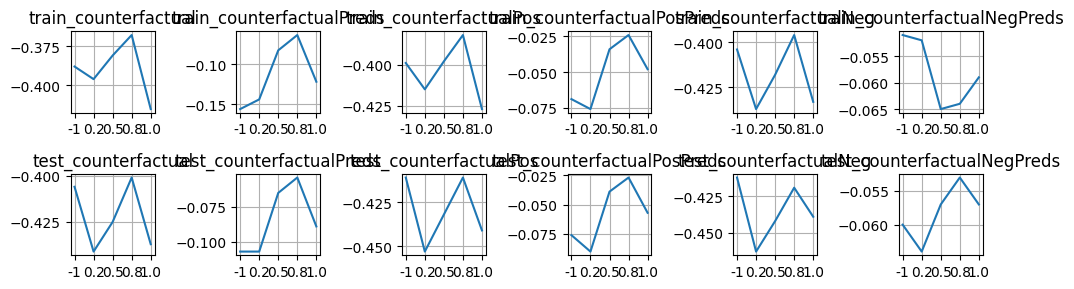

In [ ]:
plot_results(homo_perc_dict, metrics=['counterfactual','counterfactualPreds','counterfactualPos','counterfactualPosPreds','counterfactualNeg','counterfactualNegPreds'])

### n region

In [ ]:
from fair_graphs.datasets.graph_datasets import PokecData

data = PokecData(sensitive_attribute = "region", # "region", "gender"
                  target_attribute = 'marital_status_indicator',
                  include_sensitive = True,
                  num_samples = 0,
                  pre_scale_features = False,
                  region_suffix = 'n')

data.samples.shape, data.sensitive.shape, data.labels.shape, data.adj_mtx.shape

(torch.Size([66569, 265]),
 torch.Size([66569]),
 torch.Size([66569]),
 (66569, 66569))

In [ ]:
enc_params['in_channels'] = data.samples.shape[1]
fixed_params['load_dict'] = {'save_path':'data/model_init', 'name_extension':'init_pokec_n'}

In [ ]:
homo_perc_dict = {}
for homo_perc in [-1, .2, .5, .8, 1.]:
    print()
    fixed_params['highest_homo_perc'] = homo_perc
    enc = Encoder(**enc_params)
    net = SSF(enc, **fixed_params)

    results = optimize_gnn(graph_dataset = data,
                           graph_net = net,
                           evaluation_metrics = eval_scorers,
                           **fit_params)
    
    homo_perc_dict[homo_perc] = results

In [ ]:
plot_results(homo_perc_dict, metrics=['roc','rocSens1','rocSens0'])

In [ ]:
plot_results(homo_perc_dict, metrics=['accuracy','accuracyPos','accuracyNeg','accuracySens1','accuracySens0'])

In [ ]:
plot_results(homo_perc_dict, metrics=['demographicParity','demographicParityPreds','demographicParityRoc','demographicParityAccuracy'])

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityPos','equalOpportunityPosPreds','equalOpportunityPosAccuracy'])

In [ ]:
plot_results(homo_perc_dict, metrics=['equalOpportunityNeg','equalOpportunityNegPreds','equalOpportunityNegAccuracy'])

In [ ]:
plot_results(homo_perc_dict, metrics=['counterfactual','counterfactualPreds','counterfactualPos','counterfactualPosPreds','counterfactualNeg','counterfactualNegPreds'])